Defaulting to user installation because normal site-packages is not writeable
✅ TensorFlow version: 2.20.0
✅ Num GPUs Available: 0
Found 4631 images belonging to 6 classes.
Found 1157 images belonging to 6 classes.

✅ Classes detected: {'.ipynb_checkpoints': 0, 'Apple___Apple_scab': 1, 'Apple___Black_rot': 2, 'Apple___Cedar_apple_rust': 3, 'Apple___healthy': 4, 'Background_without_leaves': 5}
Training samples: 4631
Validation samples: 1157


2025-11-12 13:45:48.228986: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


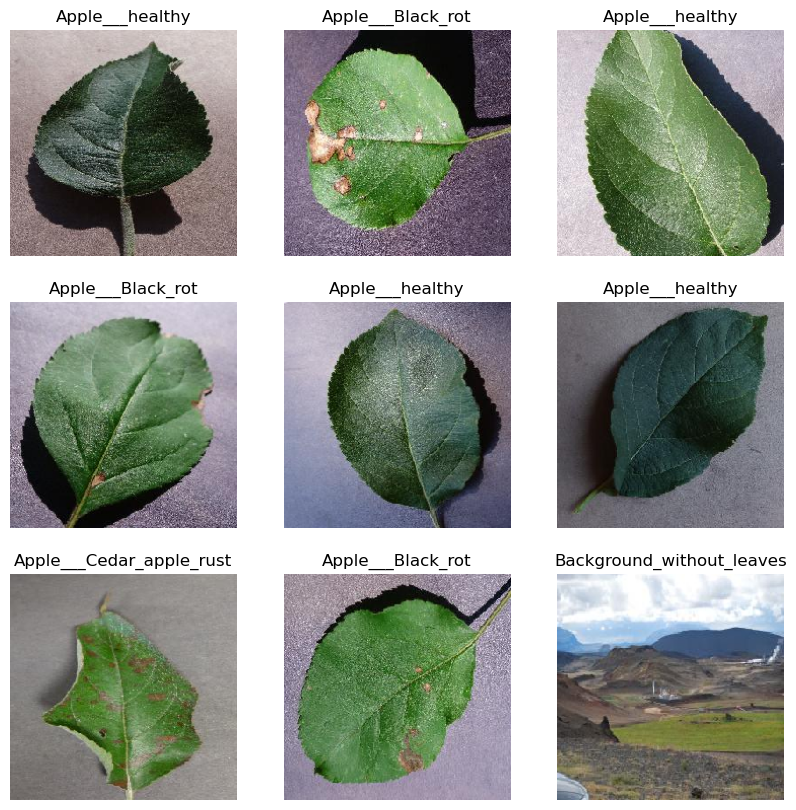

In [4]:
# =====================================
# STEP 1: Install required libraries
# =====================================
!pip install tensorflow keras matplotlib numpy

# =====================================
# STEP 2: Import libraries
# =====================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

print("✅ TensorFlow version:", tf.__version__)
print("✅ Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# =====================================
# STEP 3: Define directory path
# =====================================
# Your image folders are located in the current directory:
# ./Apple___Apple_scab
# ./Apple___Black_rot
# ./Apple___Cedar_apple_rust
# ./Apple___healthy
# (Optionally also ./Background_without_leaves)

base_dir = "./"

# Check if directory exists
if not os.path.exists(base_dir):
    raise FileNotFoundError(f"⚠️ Folder not found: {base_dir}\nPlease update 'base_dir' to the correct path.")

# =====================================
# STEP 4: Prepare ImageDataGenerators
# =====================================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80/20 split for training and validation
)

# Training generator
train_generator = datagen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# =====================================
# STEP 5: Verify dataset
# =====================================
print("\n✅ Classes detected:", train_generator.class_indices)
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")

# =====================================
# STEP 6: Preview a few sample images
# =====================================
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    label_idx = np.argmax(y_batch[i])
    label = list(train_generator.class_indices.keys())[label_idx]
    plt.title(label)
    plt.axis('off')
plt.show()

In [5]:
# =====================================
# STEP 1: Build CNN model
# =====================================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# =====================================
# STEP 2: Train CNN model
# =====================================
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# =====================================
# STEP 3: Plot training accuracy and loss
# =====================================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


/home/gcg2ws/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 140s 957ms/step - accuracy: 0.7972 - loss: 0.5531 - val_accuracy: 0.9473 - val_loss: 0.1661
Epoch 2/10
  6/145 ━━━━━━━━━━━━━━━━━━━━ 2:02 878ms/step - accuracy: 0.9475 - loss: 0.1894

KeyboardInterrupt: 